In [5]:
from fastai.vision.all import *
from utils import *
from pathlib import Path

In [6]:
key = ''

In [77]:
path = Path.cwd()/'datasets/birds'

In [78]:
path

Path('/home/fastai-2020-lalkrishna/My-files/datasets/birds')

In [48]:
birds_type = 'parrots', 'owls', 'columbidae'

if not path.exists():
    path.mkdir()
    
for bird in birds_type:
    dest = (path/bird)
    dest.mkdir(exist_ok = True)
    results = search_images_bing(key, bird)
    download_images(dest, urls=results.attrgot('contentUrl'))

In [92]:
fns = get_image_files(path)
failed = verify_image(fns)
failed

False

In [93]:
birds = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = .2, seed = 42),
    get_y = parent_label,
    item_tfms = Resize(128)
)

In [94]:
dls = birds.dataloaders(path)

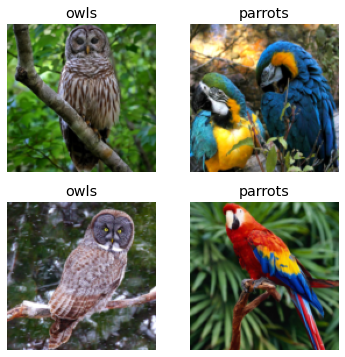

In [95]:
dls.valid.show_batch(max_n=4)

In [96]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(200)

epoch,train_loss,valid_loss,error_rate,time
0,1.839808,0.379088,0.142857,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.431855,0.247989,0.071429,00:06
1,0.362086,0.211962,0.047619,00:06
2,0.306858,0.172809,0.047619,00:06
3,0.259561,0.159645,0.047619,00:07
4,0.225400,0.153488,0.059524,00:06
5,0.186801,0.149089,0.059524,00:06
6,0.164780,0.149210,0.047619,00:05
7,0.144777,0.156880,0.047619,00:06
8,0.126777,0.158719,0.047619,00:06
9,0.110558,0.160892,0.047619,00:06


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1b25b46a70>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1203, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1177, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1b25b46a70>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1203, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1177, in _shutdown_workers
    w.join

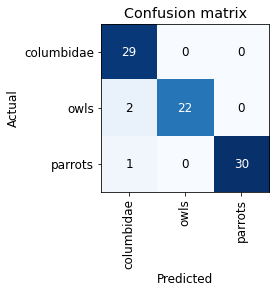

In [98]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

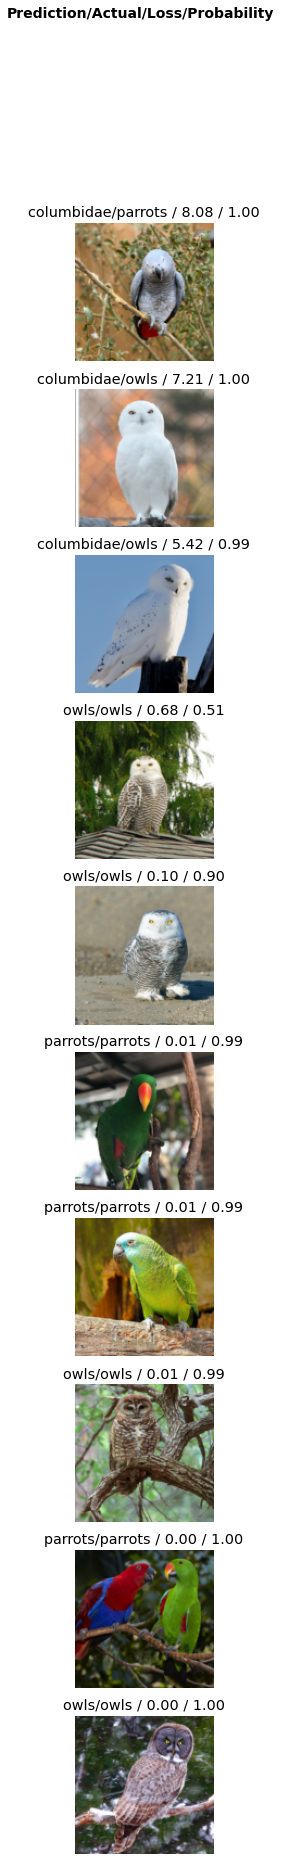

In [103]:
interp.plot_top_losses(10, nrows = 10)